# Experiência 2

1.

a) 
Seja o sinal: $x(t) = sin(2\pi f_0t) + \frac{1}{3} sin(2\pi3f_0t)$ 

Usando a identidade de Euler, podemos expressar $x$ da seguinte forma:
    $$x(t) = \frac{e^{2\pi f_0t} - e^{-2\pi f_0t}}{2j} + \frac{e^{2\pi3f_0t} - e^{-2\pi 3f_0t}}{6j}$$
    $$x(t) =  -\frac{1}{6j} e^{-2\pi 3f_0t} - \frac{1}{2j}e^{-2\pi f_0t} +\frac{1}{2j}e^{2\pi f_0t} + \frac{1}{6j}e^{2\pi3f_0t}$$
Onde podemos extrair:
$$x_{-3} = -x_3 = \frac{e^{-\frac{1}{2}\pi}}{6} = \frac{-j}{6}$$
$$x_{-1} = -x_1 = \frac{e^{-\frac{1}{2}\pi}}{2}= \frac{-j}{2}$$

b) Usando a), podemos escrever a transformada $X(j\Omega)$:
$$X(j\Omega ) = -2\pi\frac{j}{6}\delta(\Omega + 2\pi 3f_0t ) - 2\pi \frac{j}{2}\delta(\Omega + 2\pi f_0t ) + 2\pi \frac{j}{2}\delta(\Omega - 2\pi f_0t ) + 2\pi \frac{j}{6}\delta(\Omega - 2\pi 3f_0t )$$

c) O sinal terá a seguinte forma:
$$x[n] = sin(2\pi f_0nT_a) + \frac{1}{3} sin(2\pi3f_0nT_a)$$

Text(0.5, 1.0, '$x(t)$ e $x[n]$')

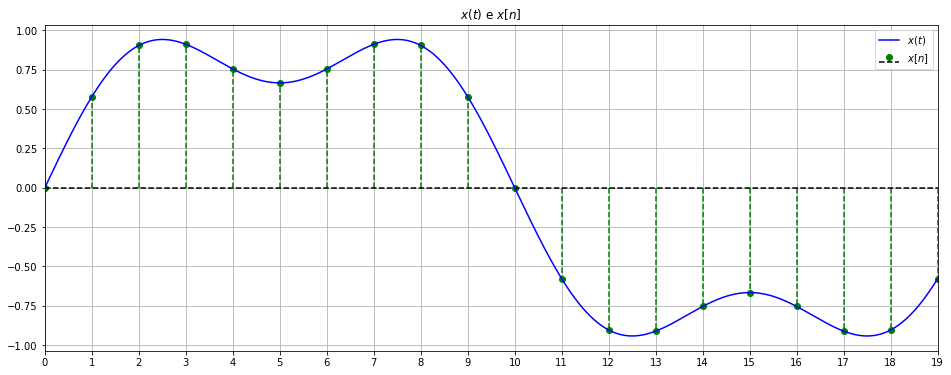

In [73]:
import numpy as np
import matplotlib.pyplot as plt
f0 = 500
Ta = 100e-6
f_continous = lambda n: np.sin(2*np.pi*t*f0) + 1/3*np.sin(2*np.pi*3*t*f0) 
f_discrete = lambda n: np.sin(2*np.pi*n*f0*Ta) + 1/3*np.sin(2*np.pi*3*n*f0*Ta)

n_final = int(1.9e-3/Ta)
array_n = np.array(list(range(0, n_final+1)))
t = np.linspace(0, 1.9e-3, 1000)

fig, ax = plt.subplots(figsize = (16, 6))
ax.stem(array_n*Ta, f_discrete(array_n), linefmt='g--', label = '$x[n]$', markerfmt='g o', basefmt = 'k--')
ax.plot(t, f_continous(t), label='$x(t)$', color='b')
ax.set_xticks(array_n*Ta, array_n)
ax.set_xlim(0, (array_n*Ta)[-1])
plt.legend()
plt.grid()
plt.title("$x(t)$ e $x[n]$")

d) Calculo da TDF $X[k]$:

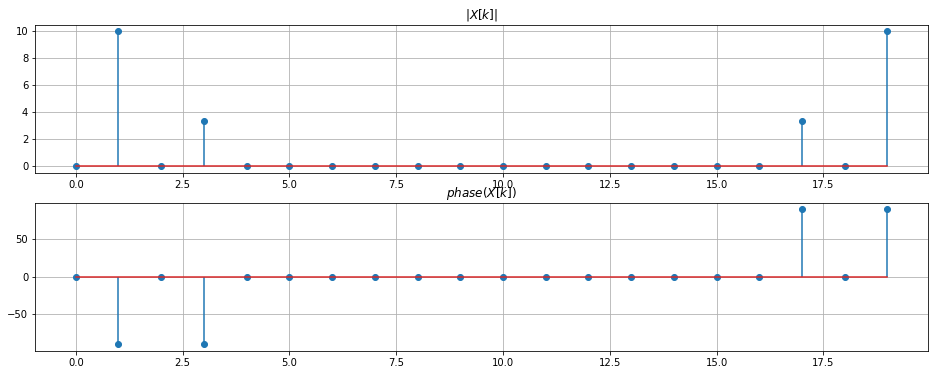

In [74]:
tdf_x = np.fft.fft(f_discrete(array_n))
tdf_x[np.isclose(tdf_x, 0)] = 0

fig, ax = plt.subplots(2,1, figsize = (16, 6))
ax[0].grid()
ax[0].stem(list(range(0,20)), np.abs(tdf_x))
ax[1].stem(list(range(0,20)), np.angle(np.round(tdf_x, 2))*180/np.pi)
ax[0].set_title("$|X[k]|$")
ax[1].set_title("$phase(X[k])$")
ax[1].grid()
plt.show()

e) A expressão da TFTD $X(e^{j\omega})$ é
    $$X(e^{j\omega}) =\frac{1}{T_a} \sum_{k=-\infty
   }^{\infty}X\left(j\left(\frac{\omega}{T_a}- k\frac{2\pi}{T_a}\right)\right)$$
   

$$X(e^{j\omega}) = \frac{1}{T_a}\sum_{k=-\infty}^{\infty}\left(-2\pi\frac{j}{6}\delta(\frac{\omega}{T_a}- k\frac{2\pi}{T_a} + 2\pi 3f_0t ) - 2\pi \frac{j}{2}\delta(\frac{\omega}{T_a}- k\frac{2\pi}{T_a} + 2\pi f_0t ) + 2\pi \frac{j}{2}\delta(\frac{\omega}{T_a}- k\frac{2\pi}{T_a} - 2\pi f_0t ) + 2\pi \frac{j}{6}\delta(\frac{\omega}{T_a}- k\frac{2\pi}{T_a} - 2\pi 3f_0t )\right)$$

Usando as propriedades do Delta de Dirac:

$$X(e^{j\omega}) = \sum_{k=-\infty}^{\infty}\left(-\pi\frac{j}{3}\delta(\omega - k 2\pi + 2\pi 3f_0t \frac{1}{T_a}) - \pi j\delta(\omega - k 2\pi + 2\pi f_0t\frac{1}{T_a} ) + \pi j\delta(\omega - k 2\pi - 2\pi f_0t \frac{1}{T_a}) + \pi \frac{j}{3}\delta(\omega - k 2\pi  - 2\pi 3f_0t \frac{1}{T_a})\right)$$

f) Sabemos a seguinte relação entre a série de fourier de tempo discreto ($\tilde{X}(k)$) e a TFTD ($X(e^{j\omega})$)?

$$\tilde{X}(n) = X(e^{j\omega})|_{\frac{2\pi n }{N_0}}$$

Dos gráficos: 

$$x_{-1} = \frac{1}{20} X[1]$$
$$x_{-3} = \frac{1}{20} X[3]$$
$$x_{3} = \frac{1}{20} X[17]$$
$$x_{1} = \frac{1}{20} X[19]$$

g)

Text(0.5, 1.0, '$x(t)$ e $x[n]$')

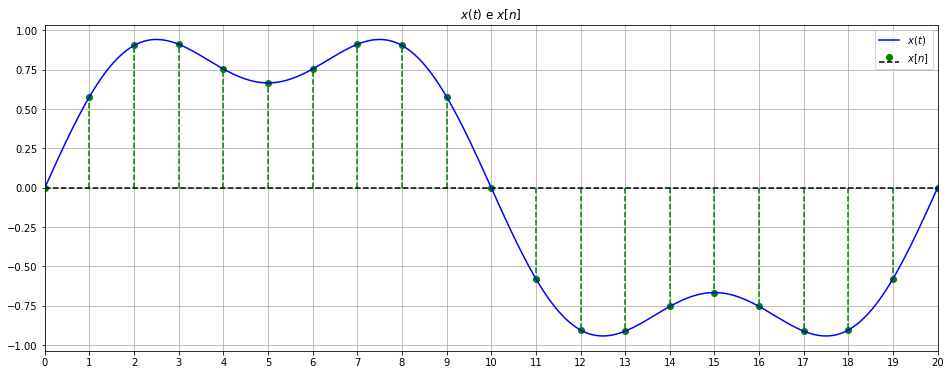

In [75]:
n_final = int(2e-3/Ta)
array_n = np.array(list(range(0, n_final+1)))
t = np.linspace(0, 2e-3, 1000)


fig, ax = plt.subplots(figsize = (16, 6))
ax.stem(array_n*Ta, f_discrete(array_n), linefmt='g--', label = '$x[n]$', markerfmt='g o', basefmt = 'k--')
ax.plot(t, f_continous(t), label='$x(t)$', color='b')
ax.set_xticks(array_n*Ta, array_n)
ax.set_xlim(0, (array_n*Ta)[-1])
plt.legend()
plt.grid()
plt.title("$x(t)$ e $x[n]$")

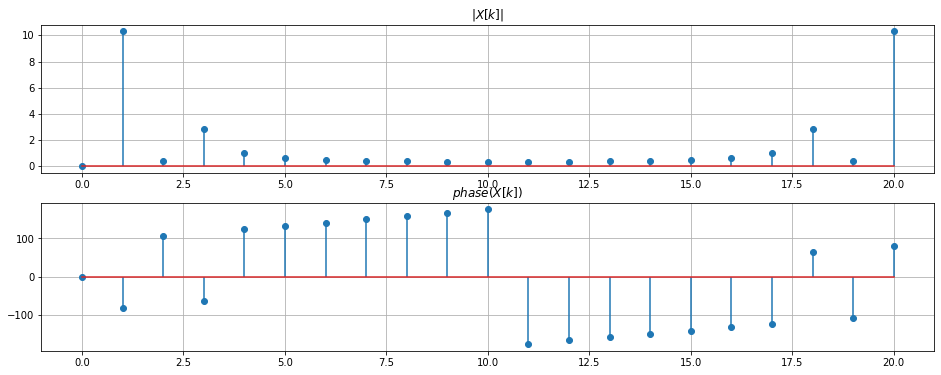

In [76]:
tdf_x = np.fft.fft(f_discrete(array_n))
tdf_x[np.isclose(tdf_x, 0)] = 0

fig, ax = plt.subplots(2,1, figsize = (16, 6))
ax[0].grid()
ax[0].stem(list(range(0,21)), np.abs(tdf_x))
ax[1].stem(list(range(0,21)), np.angle(np.round(tdf_x, 2))*180/np.pi)
ax[0].set_title("$|X[k]|$")
ax[1].set_title("$phase(X[k])$")
ax[1].grid()
plt.show()

Perceba que o espectro é bem distinto. Isso decorre do fato que a TDF considerará o periodo de 21 amostras e não 20. A próxima figura mostrará a diferença:

h)

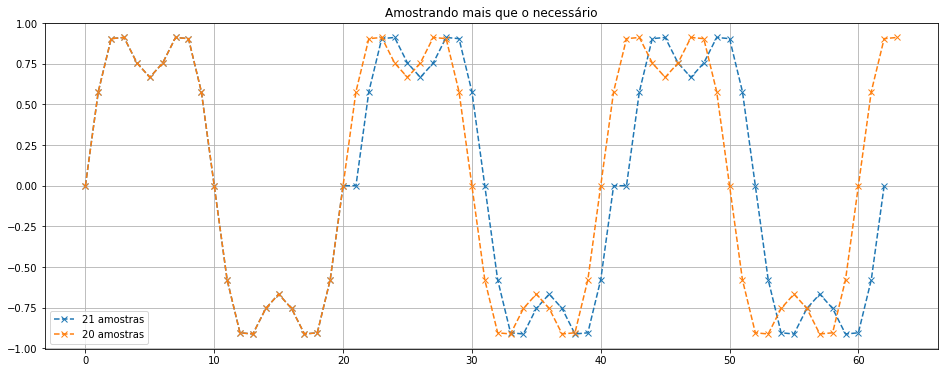

In [77]:
x_errado = np.concatenate((f_discrete(array_n),f_discrete(array_n), f_discrete(array_n)))
x_correto = f_discrete(np.array(list(range(0, 64))))
fig, ax = plt.subplots(figsize=(16,6))
plt.title("Amostrando mais que o necessário")
plt.grid()
plt.plot(x_errado, marker = 'x', linestyle = '--', label='21 amostras')
plt.plot(x_correto, marker = 'x', linestyle ='--', label ='20 amostras')
plt.legend()

Seja $P_{N_0+1}$ a janela retangular de largura $N_0 + 1 = 21$,
$$P_{N_0 +1}(e^{j\omega}) = \frac{sin\left(\omega\frac{(N_0 + 1)}{2}\right)}{sin\left(\omega\frac{1}{2}\right)} e^{-j\frac{\omega N_0}{2}}$$

A TDF será: 
$$X_{janelado}(e^{j\omega}) =\frac{1}{T_a} \sum_{k=-\infty
}^{\infty}X\left(j\left(\frac{\omega}{T_a}- k\frac{2\pi}{T_a}\right)\right)*\frac{sin\left(\omega\frac{(N_0 + 1)}{2}\right)}{sin\left(\omega\frac{1}{2}\right)} e^{-j\frac{\omega N_0}{2}}$$

Como a transformada de $X$ são impulsos, a convolução será uma soma de sincs, explicando a forma da TDF.


Text(0.5, 1.0, '$x(t)$ e $x[n]$')

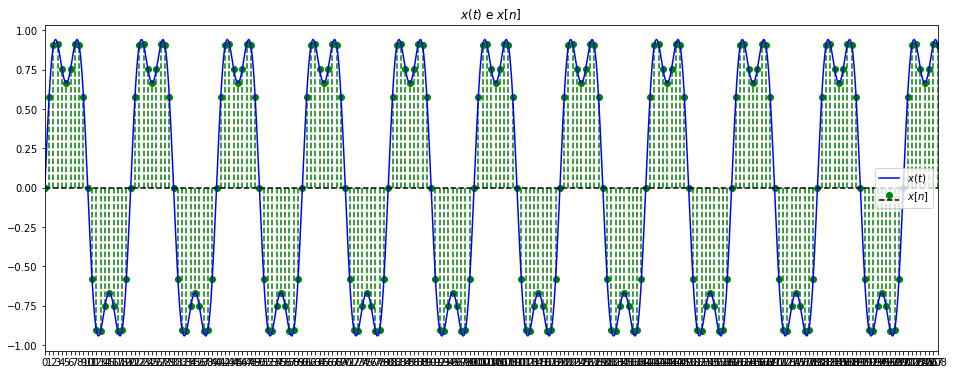

In [79]:
n_final = int(20.9e-3/Ta)
array_n = np.array(list(range(0, n_final+1)))
t = np.linspace(0, 20.9e-3, 1000)


fig, ax = plt.subplots(figsize = (16, 6))
ax.stem(array_n*Ta, f_discrete(array_n), linefmt='g--', label = '$x[n]$', markerfmt='g o', basefmt = 'k--')
ax.plot(t, f_continous(t), label='$x(t)$', color='b')
ax.set_xticks(array_n*Ta, array_n)
ax.set_xlim(0, (array_n*Ta)[-1])
plt.legend()
plt.title("$x(t)$ e $x[n]$")

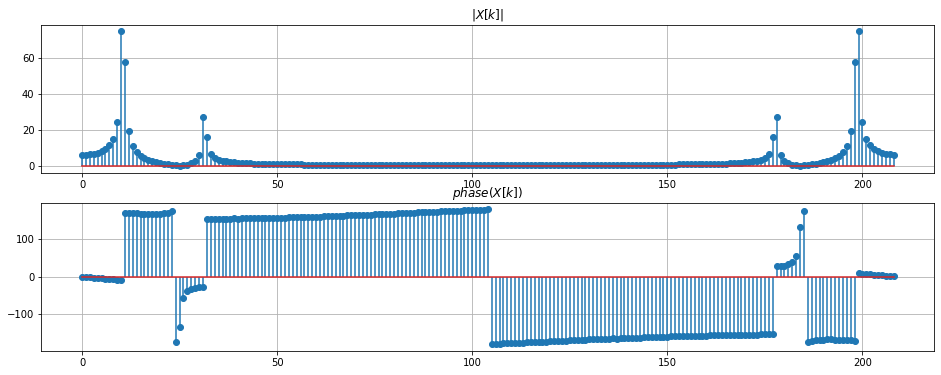

In [80]:
tdf_x = np.fft.fft(f_discrete(array_n))
tdf_x[np.isclose(tdf_x, 0)] = 0

fig, ax = plt.subplots(2,1, figsize = (16, 6))
ax[0].grid()
ax[0].stem(np.abs(tdf_x))
ax[1].stem(np.angle(np.round(tdf_x, 2))*180/np.pi)
ax[0].set_title("$|X[k]|$")
ax[1].set_title("$phase(X[k])$")
ax[1].grid()
plt.show()

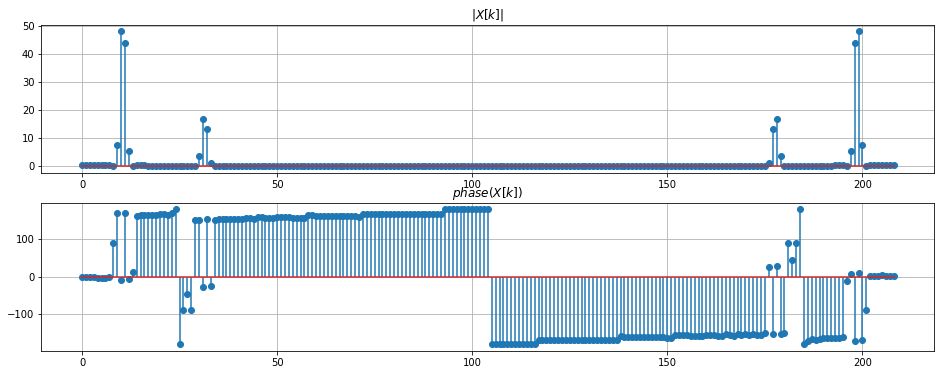

In [83]:
### Usando Hamming
tdf_x = np.fft.fft(f_discrete(array_n)*np.hamming(array_n.shape[0]))
tdf_x[np.isclose(tdf_x, 0)] = 0

fig, ax = plt.subplots(2,1, figsize = (16, 6))
ax[0].grid()
ax[0].stem(np.abs(tdf_x))
ax[1].stem(np.angle(np.round(tdf_x, 2))*180/np.pi)
ax[0].set_title("$|X[k]|$")
ax[1].set_title("$phase(X[k])$")
ax[1].grid()
plt.show()

## 2

In [85]:
pip install mat73

Note: you may need to restart the kernel to use updated packages.


In [90]:
import mat73
data_dict = mat73.loadmat('sinal.mat')
fa = data_dict['fa']
y = data_dict['y']
N0 = y.shape[0]

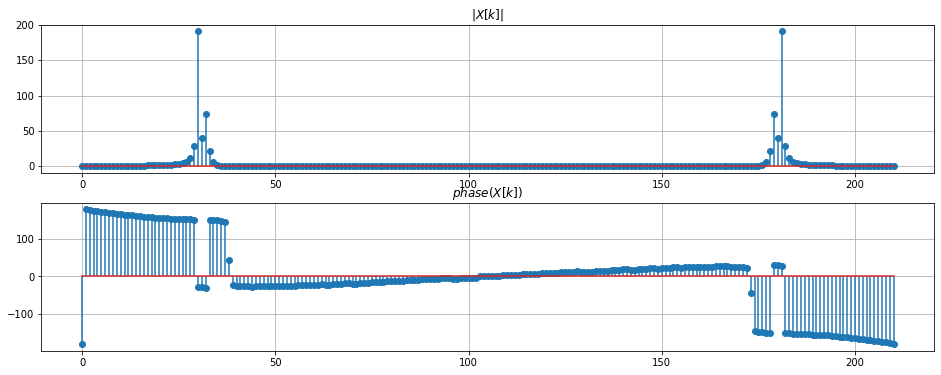

In [92]:
tdf_y = np.fft.fft(y)
tdf_y[np.isclose(tdf_y, 0)] = 0

fig, ax = plt.subplots(2,1, figsize = (16, 6))
ax[0].grid()
ax[0].stem(np.abs(tdf_y))
ax[1].stem(np.angle(np.round(tdf_y, 2))*180/np.pi)
ax[0].set_title("$|X[k]|$")
ax[1].set_title("$phase(X[k])$")
ax[1].grid()
plt.show()

In [154]:
maxval_abs = np.max(np.abs(tdf_y))
max_n = np.argwhere(np.logical_not(np.isclose(np.abs(tdf_y), 0, atol=1, rtol = 0))).reshape(-1)
max_freq = max_n*1/(N0)*fa

coef = tdf_y[max_n]/N0

s = lambda n: np.sum(coef*np.exp(1j*2*np.pi*max_freq*1/fa*n))
array_n = np.array(list(range(N0)))

estimated_y =np.array([s(n) for n in array_n]) 


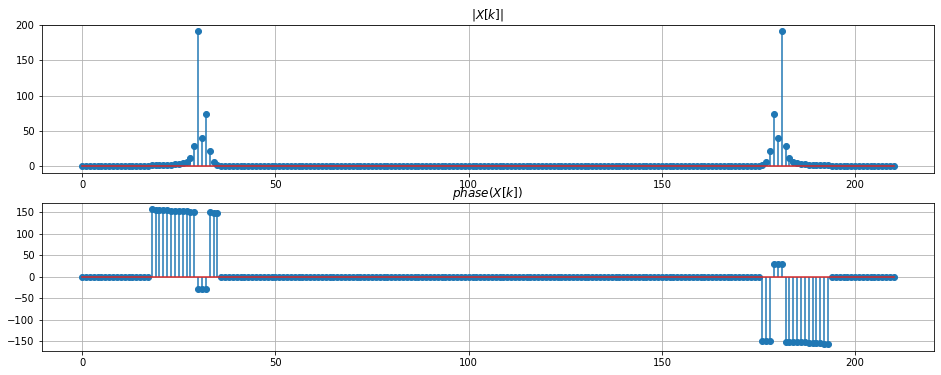

In [155]:
tdf_s = np.fft.fft(estimated_y)
tdf_s[np.isclose(tdf_s, 0)] = 0

fig, ax = plt.subplots(2,1, figsize = (16, 6))
ax[0].grid()
ax[0].stem(np.abs(tdf_s))
ax[1].stem(np.angle(np.round(tdf_s, 2))*180/np.pi)
ax[0].set_title("$|X[k]|$")
ax[1].set_title("$phase(X[k])$")
ax[1].grid()
plt.show()

C:\Users\fetet\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


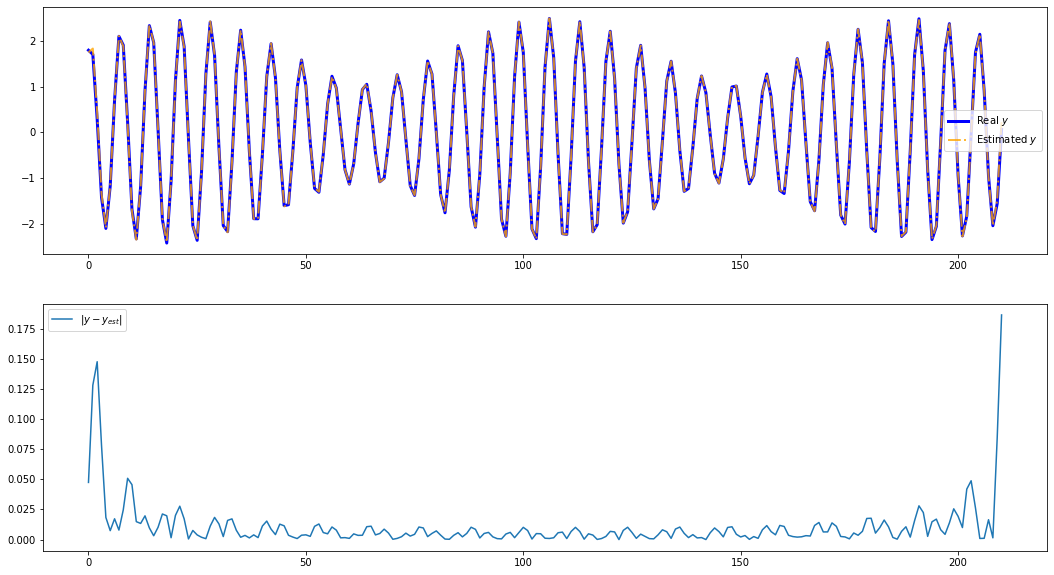

In [182]:
fig, ax = plt.subplots(2,1, figsize = (18, 10))
ax[0].plot(y, linewidth = 3, color = 'b', label = 'Real $y$')
ax[0].plot(estimated_y, alpha=0.8, linestyle = 'dashdot', color = 'orange', linewidth=2, label = 'Estimated $y$')
ax[1].plot(np.abs(y-estimated_y), label = "$|y - y_{est}|$")
ax[0].legend()
ax[1].legend()

In [183]:
max_freq

array([ 853.08056872,  900.47393365,  947.86729858,  995.26066351,
       1042.65402844, 1090.04739336, 1137.44075829, 1184.83412322,
       1232.22748815, 1279.62085308, 1327.01421801, 1374.40758294,
       1421.80094787, 1469.1943128 , 1516.58767773, 1563.98104265,
       1611.37440758, 1658.76777251, 8341.23222749, 8388.62559242,
       8436.01895735, 8483.41232227, 8530.8056872 , 8578.19905213,
       8625.59241706, 8672.98578199, 8720.37914692, 8767.77251185,
       8815.16587678, 8862.55924171, 8909.95260664, 8957.34597156,
       9004.73933649, 9052.13270142, 9099.52606635, 9146.91943128])

In [184]:
coef

array([-0.00451199+0.00189299j, -0.00499487+0.002174j  ,
       -0.00559876+0.00251939j, -0.00636976+0.0029542j ,
       -0.0073798 +0.0035176j , -0.00874701+0.00427392j,
       -0.01067819+0.00533594j, -0.01356662+0.00691848j,
       -0.01825042+0.00948008j, -0.02684035+0.01417745j,
       -0.0463418 +0.02485587j, -0.11879747+0.06462553j,
        0.79179124-0.43650825j,  0.16736579-0.09347165j,
        0.30704434-0.1737788j , -0.08833009+0.0507398j ,
       -0.02142231+0.01253685j, -0.00806725+0.00485259j,
       -0.00806725-0.00485259j, -0.02142231-0.01253685j,
       -0.08833009-0.0507398j ,  0.30704434+0.1737788j ,
        0.16736579+0.09347165j,  0.79179124+0.43650825j,
       -0.11879747-0.06462553j, -0.0463418 -0.02485587j,
       -0.02684035-0.01417745j, -0.01825042-0.00948008j,
       -0.01356662-0.00691848j, -0.01067819-0.00533594j,
       -0.00874701-0.00427392j, -0.0073798 -0.0035176j ,
       -0.00636976-0.0029542j , -0.00559876-0.00251939j,
       -0.00499487-0.002174j  ,